# Benchmarking Our Algorithm against others

In [1]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph

from panav.sequential import sequential_HybridSIPP

from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP

from panav.viz import draw_hybrid

import numpy as np

from time import time

%load_ext autoreload
%autoreload 2

In [2]:

bloating_r = 0.5
vmax = 1.0

N = 8
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout



env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = N)

# shuffled_idx = np.random.permutation(N)
shuffled_idx  = np.arange(N)
env.starts = env.starts[shuffled_idx]
env.goals = env.goals[shuffled_idx]
env.calc_start_goal_regions()

HG = HybridGraph(env,bloating_r,tunnel_end_point_buffer=0.3)



/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


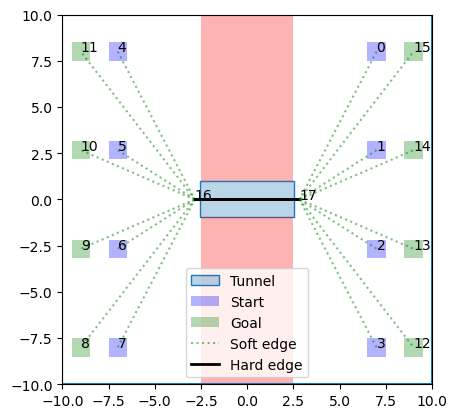

In [3]:
draw_hybrid(HG,display_soft=True)

In [4]:
continuous_plans,gp = sequential_HybridSIPP(HG,return_graph=True)

0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-15
1
2


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


MILP low-level encounters infeasibility.
3
MILP low-level encounters infeasibility.
4
5
6
7


In [5]:
continuous_plans

[(array([ 0.     , 10.96016, 16.62266, 16.8613 , 27.58281]),
  array([[ 7.     ,  3.08125, -2.83125, -3.     , -8.75   ],
         [ 8.     ,  0.25   , -0.     , -0.16875, -7.75   ]])),
 (array([ 0.     ,  5.54195, 11.20445, 11.4431 , 19.57483]),
  array([[ 7.     ,  3.08125, -2.83125, -3.     , -8.75   ],
         [ 2.66667, -0.25   , -0.     ,  0.     , -2.41667]])),
 (array([ 0.     ,  7.54195, 13.20445, 13.4431 , 21.57483]),
  array([[ 7.     ,  3.08125, -2.83125, -3.     , -8.75   ],
         [-2.66667, -0.25   , -0.     ,  0.     ,  2.41667]])),
 (array([ 0.     , 12.96016, 18.62266, 18.8613 , 29.58281]),
  array([[ 7.     ,  3.08125, -2.83125, -3.     , -8.75   ],
         [-8.     , -0.25   , -0.     ,  0.16875,  7.75   ]])),
 (array([ 0.     , 19.19579, 26.4067 , 32.0692 , 32.30785, 43.02936]),
  array([[-7.     , -8.18014, -3.08125,  2.83125,  3.     ,  8.75   ],
         [ 8.     , -0.70711, -0.25   , -0.     , -0.16875, -7.75   ]])),
 (array([ 0.     , 15.01623, 19.19579, 2

In [32]:
from matplotlib import pyplot as plt
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
from matplotlib import rcParams
import numpy as np

plans = np.array(continuous_plans)

exec_tau = 1.0
dt = exec_tau * 0.25
pos_to_ani = []
for cp in plans:
    _,xs = interpolate_positions(*cp,dt)
    pos_to_ani.append(xs)


rcParams['animation.embed_limit'] = 2**128

anim = animation(HG.env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 

/var/folders/4v/bq7m33xj6b9fm2jfm0ngdg3c0000gn/T/ipykernel_801/2126884685.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plans = np.array(continuous_plans)
